In [2]:
#1.1 has all networks imported 
#graphs 0 and 1 don't seem to work... 

#1.2
#things to do:
#bipartite projections
#network of islands with (1/?) distance as edge weights -> most central, etc...
#network of same species, but one node for each island 
#networkx?

#igraph 1.0

#using igraph here 

#1.1
#implementing some analysis examples
#need to incorporate weights, using 
#https://stackoverflow.com/questions/29655111/igraph-graph-from-numpy-or-pandas-adjacency-matrix

#sahara data set "Hym. Waiting�." causing problems?
#troubleshooting
#looks like it works if we just use the saharas...
#something's wrong. all "false" and no trues
#weight method is incorrect, matrices are different 

#this weight method seems ok. need to do sanity checks later 


#something is wrong with the indexing?

#big problem! something's wrong with the node labelling index technique. nodes dont match 
#let's leverage the get._incidence method. looks like it tells me how to label em! 
#http://igraph.org/python/doc/igraph.Graph-class.html#get_incidence
#so label rows first, then columns

#looks like the weight-combining of the multi edges was screwing it up! 

#1.6 
#hopefully this'll do it... 
#ok, looks good. some caveats: degree won't return weights
#need to use strength and pass the edge weights 


#to examine, try 
#zip(g[4].vs['label'], g[4].strength(weights = g[4].es['weight']))
#and
#adj[4]


#2.0
#seems good, had to nix the neighbor finding function for now (indexing wasn't right)
#may have to revisit previous codes (ie multinetx, etc...) to patch up the labeling and weights, etc...

#2.1 incorporating the location network 

#2.2 zhiya's merge tech solved everything in one instant 

#2.3 trying to incorporate multiple kinds of edges in the location network 

#ok, can add edges with separate weights in addition to the originals. 
#will call the #similiar species weight2


#2.5 making more readable

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%reload_ext autoreload
%autoreload 2
import scipy.stats as st
import os
from scipy.optimize import curve_fit
import igraph as ig
import csv
import powerlaw as pl

import itertools as it

I'd ran into trouble with consistency in the node/network labeling before, so these are steps to make sure that
the order of the nodes in the network is consistent with the way they're imported, etc...

Import the distances between the islands into a dataframe, and create a graph that uses 1/distance as the edgeweights.

Then, create a dataframe that contains measures from the location graph

In [4]:
data = pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Distance_between_sites_Dryad.csv")
dict1 = {'WesternSahara_1':0,
         'WesternSahara_2':1,
         'Fuerteventura_1':2,
         'Fuerteventura_2':3,
         'GranCanaria_1':4,
         'GranCanaria_2':5,
         'TenerifeSouth_1':6,
         'TenerifeSouth_2':7,
         'TenerifeTeno_1':8,
         'TenerifeTeno_2':9,
         'Gomera_1':10,
         'Gomera_2':11,
         'Hierro_1':12,
         'Hierro_2':13}


data.columns = ['From','To','Dist_m']
data['1/dist'] = 1.0 / data['Dist_m']
data = data.groupby('Dist_m').first().reset_index()

nodes = list(set(data['From'].append(data['To'])))
node_ids = range(len(nodes))
#edges and weights imported in same order, so should be consistent
edgelist = zip(data['From'],data['To'])
weights = data['1/dist']
edge_ids = []

for i in range(len(edgelist)):
    edge_ids.append((dict1[edgelist[i][0]],dict1[edgelist[i][1]]))
g_locs = ig.Graph()
g_locs.add_vertices(node_ids)
g_locs.add_edges(edge_ids)
g_locs.es['weight'] = weights
g_locs.es["width"] = ig.rescale(g_locs.es["weight"], out_range=(0.5, 3))

g_locs.vs['label'] =['WesternSahara_1',
         'WesternSahara_2',
         'Fuerteventura_1',
         'Fuerteventura_2',
         'GranCanaria_1',
         'GranCanaria_2',
         'TenerifeSouth_1',
         'TenerifeSouth_2',
         'TenerifeTeno_1',
         'TenerifeTeno_2',
         'Gomera_1',
         'Gomera_2',
         'Hierro_1',
         'Hierro_2']

loc_df = pd.DataFrame({'island':g_locs.vs['name'],
                   'island_name': g_locs.vs['label'],
                   'betweenness':g_locs.betweenness(weights = g_locs.es['weight']),
                   'pagerank': g_locs.pagerank(weights = g_locs.es['weight']),
                   'strength':g_locs.strength(weights = g_locs.es['weight'])
                   
                  })

Import the adjacency matrices (the order is important, it matches the dictionary defined in the last slide.)

In [5]:
adj = []
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site1_WesternSahara1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site2_WesternSahara2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site3_Fuerteventura1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site4_Fuerteventura2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site5_GranCanaria1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site6_GranCanaria2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site7_TenerifeSouth1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site8_TenerifeSouth2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site9_TenerifeTeno1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site10_TenerifeTeno2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site11_Gomera1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site12_Gomera2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site13_Hierro1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site14_Hierro2.csv"))

Construct networks from the adjacency matrices. To get the edgeweights:
The graph will create edges between nodes corresponding to the value in the adjacency cell.
To create a weighted edge, give each edge a weight 1, then collapse them using a sum to end up with a weighted edge between two nodes.

Using the get_incident method on graphs, we can find the order that the nodes are in within the graph object.
This should match the all_names list constructed, so use this method to assign attributes to the nodes (to make sure that plants are one color, bees another, etc...)



In [6]:
#name nodes
#keep a counter for j and k, j for red nodes and k for blue
#red nodes use column list, blue nodes use index

#assumes that the names are in order... (they are, by the get_incident function)

g = []


for i in range(len(adj)):
    
    g.append(ig.Graph.Incidence(adj[i].values.tolist(),multiple = True))
    g[i].es['weight'] = 1
    g[i] = g[i].simplify(combine_edges = {'weight':'sum'})
    all_names = np.append(adj[i].index.values, adj[i].columns.values)
    
    
    for j in range(len(all_names)):
        g[i].vs[j]['label'] = all_names[j]

    j = 0
    k = 0
    for l in range(g[i].vcount()):
        if (g[i].vs[l]['type']):
            g[i].vs[l]['color'] = 'red'
            j+= 1
        else:
            g[i].vs[l]['color'] = 'blue'
            k+=1 



With the graphs created, create dataframes containing useful measures from each of them. 

NOTE: These are the un-projected graph metrics. 

In [7]:
df = []
for i in range(len(g)):
    
    df.append(pd.DataFrame({'name': g[i].vs['label'], 
                            'type': g[i].vs['type'], 
                            'betweenness': g[i].betweenness(weights = g[i].es['weight']),
                           'degree': g[i].degree(),
                            'strength': g[i].strength(weights = g[i].es['weight']),
                            'pagerank': g[i].pagerank(weights = g[i].es['weight']),
                            'network': i
                           }))
    
    df[i]['id'] = df[i].index.tolist()

Create a total dataframe out of the dataframes for each graph.
This allows more of a "global" analysis approach. 


In [8]:
all_df = pd.DataFrame()
for i in range(len(df)):
    all_df = all_df.append(df[i])
all_df['num_occurences'] = 0
all_df['num_occurences'] = all_df.groupby('name').transform("count")
#all_df = all_df.reset_index()

Examples of angles to view the data:

Viewing all instances of a specific species

Looking at a particular network/island

Sorting by a network metric (betweenness, etc...)

Sorting by the number of times a species appears in all data

Sorting by "strength" (weighted degree)

Creating a dataframe out of just the saharas

In [9]:
all_df[all_df['name']=='Anaspis proteus']

,betweenness,degree,name,network,pagerank,strength,type,id,num_occurences
0,0.000000,1,Anaspis proteus,2,0.006872,2.0,False,0,8
1,0.000000,1,Anaspis proteus,3,0.004848,2.0,False,1,8
1,5.500000,3,Anaspis proteus,4,0.016655,13.0,False,1,8
3,39.166667,3,Anaspis proteus,5,0.028187,17.0,False,3,8
2,32.058766,2,Anaspis proteus,6,0.005151,2.0,False,2,8
2,344.191667,4,Anaspis proteus,7,0.022595,19.0,False,2,8
1,222.166667,6,Anaspis proteus,8,0.044440,49.0,False,1,8
2,0.000000,4,Anaspis proteus,9,0.030414,45.0,False,2,8


In [10]:
all_df[all_df['network'] == 2].head()

,betweenness,degree,name,network,pagerank,strength,type,id,num_occurences
0,0.0,1,Anaspis proteus,2,0.006872,2.0,False,0,8
1,98.0,3,Anthophora alluaudi,2,0.024068,7.0,False,1,11
2,0.0,2,Aphthona wachnitzae,2,0.016031,11.0,False,2,2
3,0.0,1,Araneae sp. 1,2,0.004315,1.0,False,3,1
4,0.0,1,Attagenus abbreviatus,2,0.005066,1.0,False,4,1


In [11]:
all_df.sort_values('betweenness', ascending = False).head()

,betweenness,degree,name,network,pagerank,strength,type,id,num_occurences
47,1039.633333,22,Euphorbia balsamifera (m),1,0.156012,92.0,True,47,14
54,779.350000,16,Argyranthemum frutescens,7,0.103696,97.0,True,54,6
42,759.500000,22,Launaea arborescens,2,0.129576,61.0,True,42,12
62,741.600000,4,Schizogyne sericea,9,0.009941,4.0,True,62,6
7,712.083333,15,Camponotus feae,9,0.136175,195.0,False,7,11


In [12]:
all_df.sort_values('num_occurences', ascending = False).head()

,betweenness,degree,name,network,pagerank,strength,type,id,num_occurences
40,101.000000,3,Euphorbia balsamifera (f),6,0.050253,46.0,True,40,14
39,123.000000,5,Euphorbia balsamifera (f),2,0.064480,52.0,True,39,14
36,93.916667,7,Euphorbia balsamifera (m),12,0.103402,76.0,True,36,14
35,79.750000,5,Euphorbia balsamifera (f),12,0.047751,32.0,True,35,14
49,297.566667,8,Euphorbia balsamifera (f),9,0.057147,74.0,True,49,14


In [13]:
all_df.sort_values('strength', ascending = False).head()

,betweenness,degree,name,network,pagerank,strength,type,id,num_occurences
7,712.083333,15,Camponotus feae,9,0.136175,195.0,False,7,11
9,274.024675,12,Camponotus feae,6,0.206666,187.0,False,9,11
39,294.900000,16,Euphorbia balsamifera (m),3,0.170886,183.0,True,39,14
10,135.000000,7,Camponotus feae,5,0.158817,177.0,False,10,11
7,152.000000,12,Camponotus feae,8,0.153488,157.0,False,7,11


In [14]:
sahara_df = all_df[(all_df['network'] == 0) | (all_df['network'] == 1)]

In [15]:
sahara_df.sort_values('pagerank', ascending = False).head()

,betweenness,degree,name,network,pagerank,strength,type,id,num_occurences
47,1039.633333,22,Euphorbia balsamifera (m),1,0.156012,92.0,True,47,14
39,510.500000,16,Euphorbia balsamifera (m),0,0.155922,118.0,True,39,14
50,386.716667,12,Launaea arborescens,1,0.077522,39.0,True,50,12
38,170.833333,7,Euphorbia balsamifera (f),0,0.073589,64.0,True,38,14
45,427.000000,9,Asparagus pastorianus,1,0.071988,50.0,True,45,2


In [16]:
#check the correlation between a node's stats and the island's stats

Playing with the idea of pearson correlations between a species stats in an island and the stats of the island itself.
Thanks to Zhiya for the merge approach! 

The way it works: 
Take the all_df, and "merge" it with the stats of the island df
This means that each row will also display the stats of the island it belongs to (pagerank_y, betweenness_y)

_y = island stats, _x = species stats

In [17]:
#now, need to add the parameters of the island that each member is a part of to the all_df

In [18]:
all_df = all_df.merge(right=loc_df[['island', 'pagerank', 'betweenness', 'strength']], \
                right_on='island', left_on='network', how='left')

In [18]:
st.pearsonr(all_df['pagerank_x'], all_df['pagerank_y'])

(0.019143953725721585, 0.61361707781424846)

In [19]:
st.pearsonr(all_df[all_df['name'] == 'Amegilla sp.']['betweenness_x'], all_df[all_df['name'] == 'Amegilla sp.']['betweenness_y'])

(1.0, 0.0)

In [20]:
st.pearsonr(all_df['strength_x'], all_df['strength_y'])

(-0.0065155577124520921, 0.86356936341327784)

In [21]:
st.pearsonr(all_df[all_df['name'] == 'Euphorbia balsamifera (m)']['betweenness_x'], all_df[all_df['name'] == 'Euphorbia balsamifera (m)']['betweenness_y'])

(0.7889603714963519, 0.00079566489232087254)

In [22]:
st.pearsonr(all_df[all_df['name'] == 'Euphorbia balsamifera (m)']['betweenness_x'], all_df[all_df['name'] == 'Euphorbia balsamifera (m)']['betweenness_y'])

(0.7889603714963519, 0.00079566489232087254)

Only looking at the top-degreed nodes
Trying some PR correlations and then plotting the PDF (no success)

In [23]:
top_deg = all_df.sort_values('degree',ascending = False).head(100)
top_deg = set(top_deg['name'])
top_deg = all_df[all_df['name'].isin(top_deg)]
pr_corr = all_df.groupby('name')[['pagerank_x','pagerank_y']].corr('pearson', min_periods = 3).reset_index()
pr_corr = pr_corr[(pr_corr['level_1'] == 'pagerank_x')]['pagerank_y'].dropna()

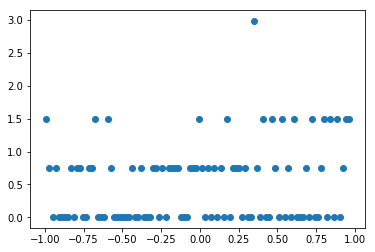

In [24]:
hist, bins = np.histogram(pr_corr, bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.scatter(bin_centers, hist)

Constructing the multi-edged graph of locations
Two edgetypes: 1/distance and # of species in common

combos = list of edges between each of the 14 islands to every other island

"len(set(df[combos[i][0]]['name'].values).intersection(df[combos[i][1]]['name']))" takes the species in either node connected by the edge, finds the common list, then takes the length 

add edges to the network corresponding to the two target networks, 
weighted separately ("weight2"): this is done to "differentiate" between the "species count edges" (weight2) and the distance edges (weight)



In [25]:
combos = list(it.combinations(g_locs.vs['name'], 2))
for i in range(len(combos)):
    match = len(set(df[combos[i][0]]['name'].values).intersection(df[combos[i][1]]['name']))
    g_locs.add_edge(combos[i][0], combos[i][1], weight2 = match)

Change the weights so that:
Distance edges have nonzero weights, but 0 weight2s
Species edges have 0 weights, but nonzero weight2s

In [26]:
for i in range(len(g_locs.get_edgelist())):
    if g_locs.es[i]['weight'] == None:
        g_locs.es[i]['weight'] = 0
    if g_locs.es[i]['weight2'] == None:
        g_locs.es[i]['weight2'] = 0
   

Recolor the edges to match their type, and add widths

Edges assigned weights relative to their type 
(Edges of the first kind are weighted relative to others also of that kind, etc...)

In [27]:
#if weight = 0, then edge is of the species comparison type (those have weight2)
for i in range(len(g_locs.get_edgelist())):
    if g_locs.es[i]['weight'] != 0:
        g_locs.es[i]['width'] = ig.rescale(g_locs.es["weight"], out_range=(0.5, 3))[i]
        g_locs.es[i]['color'] = 'black'
    else:
        g_locs.es[i]['width'] = ig.rescale(g_locs.es["weight2"], out_range=(0,1))[i]
        g_locs.es[i]['color'] = 'blue'


In [32]:
plot = ig.plot(g_locs,autocurve = True, layout = 'kk')
plot.show()